In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.base import clone
import itertools as it
from itertools import combinations
from sklearn.metrics import accuracy_score

In [49]:
%matplotlib inline
df_ORF_1 = pd.read_csv('mtdoORF_RF1.csv',header = None)
df_ORF_1.columns = ["Codon","Count"]

In [50]:
df_ORF_1.head(6)

,Codon,Count
0,agc,76
1,aaa,230
2,cct,109
3,gtg,57
4,tgg,82
5,tcc,97


In [51]:
df_ORF_1.dtypes

Codon    object
Count     int64
dtype: object

In [52]:
df_ORF_1.sort_values(by=['Count'],ascending=False).head(6)


,Codon,Count
1,aaa,230
25,ttt,226
33,att,173
37,tat,167
23,tct,152
39,aat,151


In [53]:
names = df_ORF_1.loc[:,'Codon']
values = df_ORF_1.loc[:,'Count']

In [54]:
#names

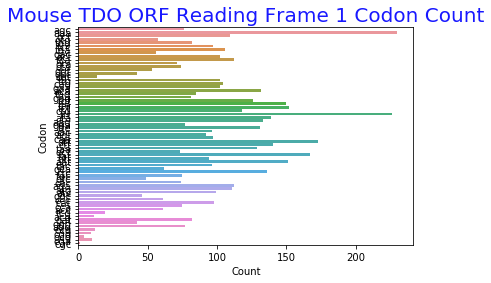

In [55]:
g = sns.barplot(x =values, y = names )
g.axes.set_title('Mouse TDO ORF Reading Frame 1 Codon Count', fontsize=20,color="b",alpha=0.9)

In [56]:
df_ORF_2 = pd.read_csv('mtdoORF_RF2.csv',header = None)
df_ORF_2.columns = ["Codon","Count"]
names = df_ORF_2.loc[:,'Codon']
values = df_ORF_2.loc[:,'Count']

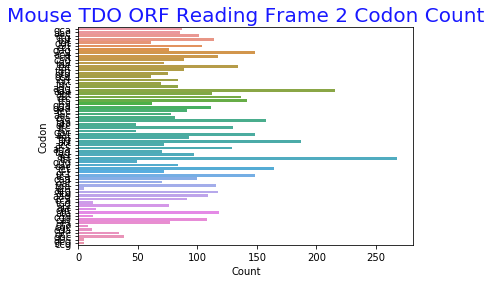

In [57]:
g = sns.barplot(x =values, y = names )
g.axes.set_title('Mouse TDO ORF Reading Frame 2 Codon Count', fontsize=20,color="b",alpha=0.9)

In [58]:
df_ORF_3 = pd.read_csv('mtdoORF_RF3.csv',header = None)
df_ORF_3.columns = ["Codon","Count"]
names = df_ORF_3.loc[:,'Codon']
values = df_ORF_3.loc[:,'Count']

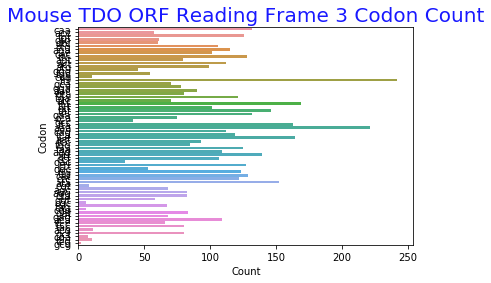

In [59]:
g = sns.barplot(x =values, y = names )
g.axes.set_title('Mouse TDO ORF Reading Frame 3 Codon Count', fontsize=20,color="b",alpha=0.9)

In [60]:
df_ORF_1.sort_values(by=['Count'],ascending=False)


,Codon,Count
1,aaa,230
25,ttt,226
33,att,173
37,tat,167
23,tct,152
39,aat,151
22,tta,150
34,ctt,140
26,ata,139
42,ctc,136


In [61]:
df_ORF_2.sort_values(by=['Count'],ascending=False).head(10)

,Codon,Count
38,ttt,268
18,aaa,216
33,att,187
41,tct,164
27,taa,158
43,tca,148
7,aca,148
31,aat,148
21,tta,142
20,ctc,137


In [62]:
df_ORF_3.sort_values(by=['Count'],ascending=False).head(6)

,Codon,Count
15,ttt,242
29,aaa,221
22,tct,169
32,aat,164
28,tta,163
45,ata,152


In [63]:
# Look for the count of a specific codon in the dataframe
df_ORF_1.loc[df_ORF_1['Codon'] == 'tga']

,Codon,Count
6,tga,106


In [64]:
df_ORF_2.loc[df_ORF_2['Codon'] == 'atg']

,Codon,Count
48,atg,117


In [65]:
df_ORF_3.loc[df_ORF_3['Codon'] == 'tga']

,Codon,Count
20,tga,121


In [66]:
ORF1_top_ten = df_ORF_1.sort_values(by=['Count'],ascending=False).head(10)

In [67]:
ORF1_top_ten

,Codon,Count
1,aaa,230
25,ttt,226
33,att,173
37,tat,167
23,tct,152
39,aat,151
22,tta,150
34,ctt,140
26,ata,139
42,ctc,136


In [68]:
names = ORF1_top_ten.loc[:,'Codon']
values = ORF1_top_ten.loc[:,'Count']

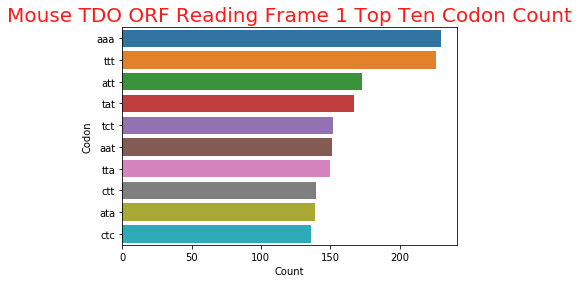

In [69]:
g = sns.barplot(x =values, y = names )
g.axes.set_title('Mouse TDO ORF Reading Frame 1 Top Ten Codon Count', fontsize=20,color="r",alpha=0.9)

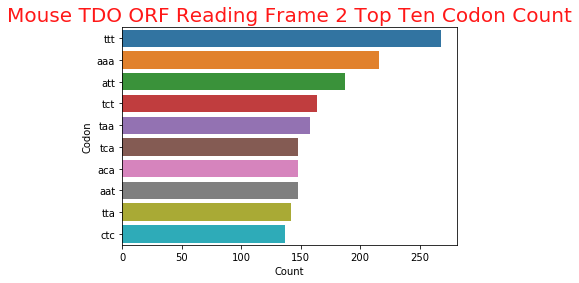

In [70]:
ORF2_top_ten = df_ORF_2.sort_values(by=['Count'],ascending=False).head(10)
names = ORF2_top_ten.loc[:,'Codon']
values = ORF2_top_ten.loc[:,'Count']

g = sns.barplot(x =values, y = names )
g.axes.set_title('Mouse TDO ORF Reading Frame 2 Top Ten Codon Count', fontsize=20,color="r",alpha=0.9)

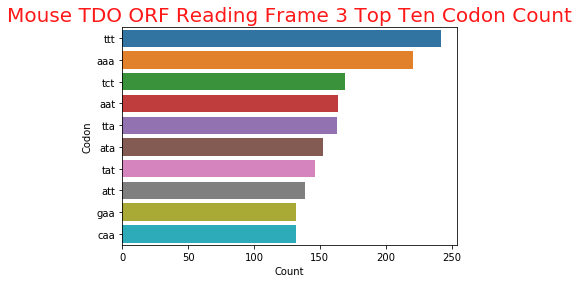

In [71]:
ORF3_top_ten = df_ORF_3.sort_values(by=['Count'],ascending=False).head(10)
names = ORF3_top_ten.loc[:,'Codon']
values = ORF3_top_ten.loc[:,'Count']

g = sns.barplot(x =values, y = names )
g.axes.set_title('Mouse TDO ORF Reading Frame 3 Top Ten Codon Count', fontsize=20,color="r",alpha=0.9)